In [1]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys
import numpy as np
sys.path.append(os.path.abspath("../src"))

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from gan import GAN
%load_ext autoreload
%autoreload 2

In [4]:
noise_size = 64
model = GAN(noise_dim=noise_size,
            input_dim=(28, 28, 1),
            discriminator_units=(16, 16, 8),
            generator_units=(8, 32, 32))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               33280     
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 32)        2336      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 32)        9248      
__________

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [5]:
data = mnist.load_data()
train, test = data
X, y = train
X = X
X = X.astype(np.float32) / 128 - 1
X = np.expand_dims(X, 3)

In [6]:
predictions = []
noise = np.random.normal(0, 1, (64, noise_size))


In [7]:
for i in range(100):
    print(i)
    model.train(X, 1, 512)
    pred = model.generator.predict(noise)
    predictions.append(pred)

0


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0.8362479 , 0.5516665, 0.29570645 , 0.75313
1
0.93988025 , 0.5685944, 0.102438904 , 0.78549844
2
0.9597093 , 0.5427838, 0.13842148 , 0.79933727
3
0.95064527 , 0.5519915, 0.17477965 , 0.77053285
4
0.93844163 , 0.5759177, 0.23735477 , 0.719593
5
0.87908465 , 0.6050493, 0.28368723 , 0.6872079
6
0.8303511 , 0.64214456, 0.33873364 , 0.63006645
7
0.8006941 , 0.65930563, 0.36611912 , 0.6073718
8
0.76613116 , 0.67766917, 0.3957582 , 0.5751953
9
0.732274 , 0.69336045, 0.4296291 , 0.5402644
10
0.7240009 , 0.690413, 0.4418987 , 0.5371344
11
0.7190351 , 0.6943322, 0.44538763 , 0.5272603
12
0.71289104 , 0.70026815, 0.4663879 , 0.50706965
13
0.7095036 , 0.6972779, 0.46617088 , 0.50974894
14
0.7082707 , 0.6963506, 0.46536958 , 0.51071715
15
0.70302254 , 0.69771934, 0.47265625 , 0.50303817
16
0.7026763 , 0.6958159, 0.4667635 , 0.50687766
17
0.70167017 , 0.69297856, 0.46293235 , 0.51572514
18
0.70257527 , 0.69233847, 0.46130475 , 0.5197566
19
0.7019218 , 0.692615, 0.46088743 , 0.51876336
20
0.7008984 ,

KeyboardInterrupt: 

In [8]:
noise = np.random.normal(0, 1, (16, 64))

In [9]:
im = model.generator.predict(noise)

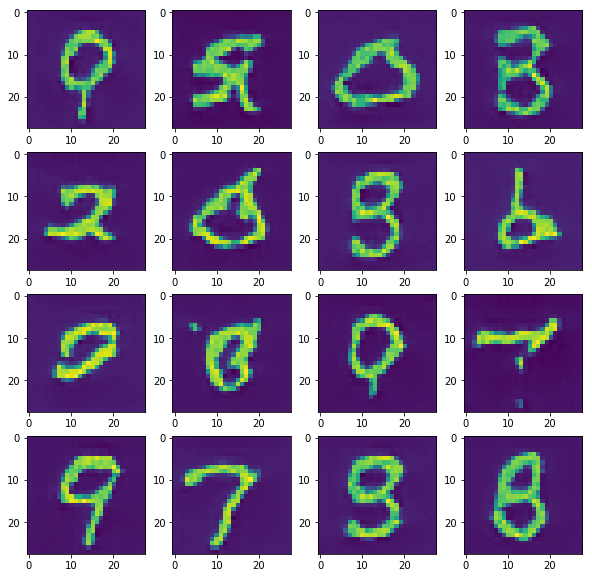

In [17]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(im[i,:,:,0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, axes = plt.subplots(8, 8)
fig.set_figheight(10)
fig.set_figwidth(10)
axes = axes.ravel()
ims =  [ ax.imshow(predictions[0][i,:,:,0], 
                   vmin=-1, vmax=1, cmap="gray_r",
                   animated=True)
         for i, ax in enumerate(axes)
       ]
for ax in axes:
    ax.axis("off")


def animate(i):
    for j, im in enumerate(ims):
        im.set_array(predictions[i][j,:,:,0])
    return ims


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(predictions), interval=100, blit=True)

In [14]:
HTML(anim.to_html5_video())

In [15]:
anim.save("numbers.mp4")

In [77]:
def interpolate(model, left, right, n=10):
    left = left.reshape(1, -1)
    right = right.reshape(1, -1)
    alpha = np.linspace(0, 1, n).reshape(-1, 1)
    interpolation = alpha * right + (1 - alpha) * left
    interpolation_numbers = model.generator.predict(interpolation)
    
    plt.figure(figsize=(n*2, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        ax.imshow(interpolation_numbers[i, :, :, 0], vmin=-1, vmax=1, cmap="gray_r")
        ax.axis('off')

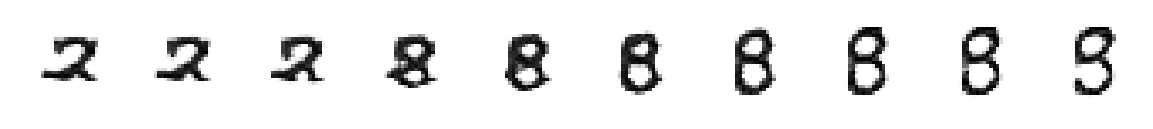

In [79]:
interpolate(model, noise[4], noise[6])

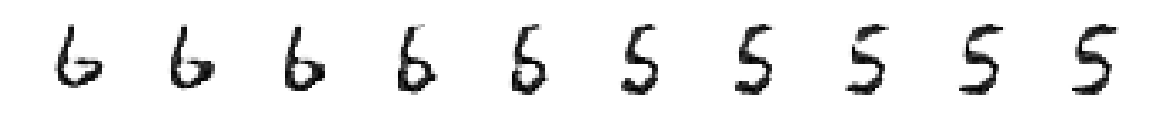

In [114]:
interpolate(model, np.random.normal(size=64), np.random.normal(size=64))